<a href="https://colab.research.google.com/github/Amisha1019/Emotion-Detection-Internship-/blob/main/Task_2_of_emotion_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
iamsouravbanerjee_animal_image_dataset_90_different_animals_path = kagglehub.dataset_download('iamsouravbanerjee/animal-image-dataset-90-different-animals')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-image-classification-using-efficientnetb7/__results__.html
/kaggle/input/animal-image-classification-using-efficientnetb7/animals_classification_model_checkpoint.data-00000-of-00001
/kaggle/input/animal-image-classification-using-efficientnetb7/temp_file_name.jpeg
/kaggle/input/animal-image-classification-using-efficientnetb7/__notebook__.ipynb
/kaggle/input/animal-image-classification-using-efficientnetb7/animals_classification_model_checkpoint.index
/kaggle/input/animal-image-classification-using-efficientnetb7/__output__.json
/kaggle/input/animal-image-classification-using-efficientnetb7/helper_functions.py
/kaggle/input/animal-image-classification-using-efficientnetb7/checkpoint
/kaggle/input/animal-image-classification-using-efficientnetb7/cam.jpg
/kaggle/input/animal-image-classification-using-efficientnetb7/custom.css
/kaggle/input/animal-image-classification-using-efficientnetb7/__pycache__/helper_functions.cpython-37.pyc
/kaggle/input/animal-image-classifi

In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 75.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")  # or your trained weights


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
CARNIVORES = ["lion", "tiger", "leopard", "wolf", "fox", "hyena", "bear", "jaguar", "cheetah"]


In [ ]:
model = YOLO("yolov8m.pt")  # or your custom trained model


In [ ]:
img_path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/bear/039b2ae790.jpg"
img = cv2.imread(img_path)
results = model(img)


0: 640x448 1 bear, 861.2ms
Speed: 17.6ms preprocess, 861.2ms inference, 25.6ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
def draw_and_count(frame, results):
    carnivore_count = 0
    for r in results:  # results is a list of Results
        for box in r.boxes:
            cls_id = int(box.cls[0])
            label = r.names[cls_id].lower()
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            if label in CARNIVORES:
                color = (0, 0, 255)  # red
                carnivore_count += 1
            else:
                color = (0, 255, 0)

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return frame, carnivore_count

In [ ]:
annotated_img, carn_count = draw_and_count(img.copy(), results)


In [ ]:
print("Carnivores detected:", carn_count)


Carnivores detected: 1


(-0.5, 1060.5, 1599.5, -0.5)

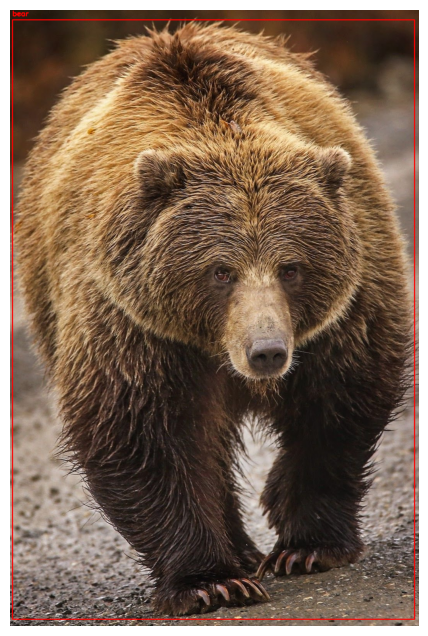

In [ ]:
annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(annotated_rgb)
plt.axis("off")

(-0.5, 1060.5, 1599.5, -0.5)

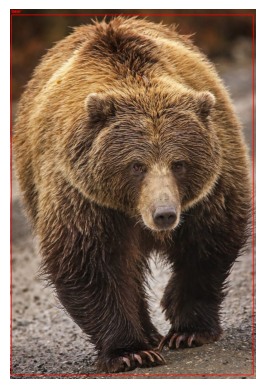

In [ ]:
import matplotlib.pyplot as plt
annotated = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
plt.imshow(annotated)
plt.axis('off')


In [ ]:
import ipywidgets as widget
from IPython.display import display

In [ ]:
upload = widgets.FileUpload(accept="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/bear/039b2ae790.jpg", multiple=False)
button = widgets.Button(description="Detect Animals")

display(upload, button)


FileUpload(value=(), accept='/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/bear/039b…

Button(description='Detect Animals', style=ButtonStyle())

In [ ]:
def on_button_clicked(b):
    if upload.value:
        # Get the uploaded image
        key = list(upload.value.keys())[0]
        content = upload.value[key]["content"]
        nparr = np.frombuffer(content, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        results = model(img)
        annotated_img, carn_count = draw_and_count(img.copy(), results)

        # Display
        annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 6))
        plt.imshow(annotated_rgb)
        plt.axis("off")

        print(f"Carnivores detected: {carn_count}")

button.on_click(on_button_clicked)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [ ]:
upload = widgets.FileUpload(
    accept="image/*",
    multiple=False,
    description="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/fox/046e05e07b.jpg",
    style={'description_width': 'initial'},
    layout=widgets.Layout(
        width='250px',
        height='40px',
        border='2px solid #4CAF50',
        padding='5px',
        margin='10px auto'
    )
)

In [ ]:
btn = widgets.Button(
    description="Detect Animals",
    button_style="success",
    layout=widgets.Layout(
        width='250px',
        height='40px',
        margin='10px auto'
    ),
    style={
        "button_color": "#2E8B57",
        "text_color": "white",
        "font_weight": "bold"
    }
)


In [ ]:
ui_box = widgets.VBox(
    [upload, btn],
    layout=widgets.Layout(
        align_items='center',
        justify_content='center',
        width='100%'
    )
)

display(ui_box)


In [ ]:
def on_click(b):
    if upload.value:
        key = list(upload.value.keys())[0]
        content = upload.value[key]["content"]

        # Convert uploaded image to numpy array
        nparr = np.frombuffer(content, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        # Run model prediction
        results = model(img)

        # Draw boxes + count carnivores
        annotated, carn_count = draw_and_count(img.copy(), results)

        annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 6))
        plt.imshow(annotated_rgb)
        plt.axis("off")
        plt.title(f"Carnivores detected: {carn_count}", fontsize=14, color="red")

btn.on_click(on_click)
